## Import Libraries 

In [111]:
import json
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools  # to install $ pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings 
warnings.filterwarnings("ignore")

## Import Data

In [146]:
df = pd.read_csv("E:\Downlload\fake_real_dataset_test_Dheeraj.csv")

In [147]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,uuid,ord_in_thread,author,published,title,text,...,likes,comments,shares,type,content,spam_score_fector,category_fector,fake,click_bait_score,toxicity_fector
0,0,0,0,0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED They Stole Millions In Gov t...,Print They should pay all the back all the mon...,...,0,0,0,bias,print they pay back money plus interest the en...,0.993337,business,0,0.999951,0
1,1,1,1,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,...,0,0,0,bias,why did attorney general loretta lynch plead t...,0.824470,business,0,0.997981,0
2,2,2,2,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING Weiner Cooperating With FBI On Hilla...,Red State Fox News Sunday reported this mo...,...,0,0,0,bias,red state fox news sunday reported morning ant...,0.998415,business,0,0.001113,0
3,3,3,3,3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,...,0,0,0,bias,email kayla mueller prisoner tortured isis cha...,0.982233,sport,0,0.001539,0
4,4,4,4,4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,...,0,0,0,bias,email healthcare reform to make america great ...,0.976653,business,0,0.998544,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,3706,3706,3706,3706,9c4dbbf59eaf4efc4c18b4ec046fbda1ef371e8c,0,Lynh Bui,2016-11-16T21:00:00.000+02:00,How much would you pay to get a family member...,How much would you pay to get a family member...,...,8,0,8,news,how much pay family member back the washington...,0.969041,business,1,0.997974,0
3707,3707,3707,3707,3707,f5bb2bb212476876d80ce631885dd3319e08c562,0,sfgate.com,2016-11-30T03:57:00.000+02:00,Man pleads guilty in Clint Eastwood documentar...,Man pleads guilty in Clint Eastwood documentar...,...,0,0,0,news,man pleads guilty clint eastwood documentary scam,0.900779,entertainment,1,0.999939,0
3708,3708,3708,3708,3708,2ca49973d45886d036c6d44fd21bf649ae6629ba,0,Jonathan Garber (jgarber@businessinsider.com),2016-11-21T19:27:00.000+02:00,10 things you need to know before the opening ...,10 things you need to know before the opening ...,...,3,0,3,news,thing need know opening bell,0.977136,sport,1,0.997737,0
3709,3709,3709,3709,3709,5b74a67cb3de2d51ea495e8447ed4941c6e19443,0,Kevin Lynch,2016-11-17T19:29:00.000+02:00,9 reasons why the 49ers should bring back Kaep...,9 reasons why the 49ers should bring back Kaep...,...,6,0,6,news,reason bring back kaepernick,0.982473,sport,1,0.001696,3


## Data Preprocessing

In [149]:
df.shape

(3711, 30)

In [150]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'ord_in_thread', 'replies_count', 'participants_count', 'country','likes', 'comments', 'site_url', 'language','content', 'ord_in_thread', 'uuid', 'crawled'], axis=1, inplace=True)

In [151]:
df.shape

(3711, 16)

In [152]:
df.head()

,Unnamed: 0.1.1.1,author,published,title,text,domain_rank,thread_title,spam_score,main_img_url,shares,type,spam_score_fector,category_fector,fake,click_bait_score,toxicity_fector
0,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED They Stole Millions In Gov t...,Print They should pay all the back all the mon...,88465,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.993337,business,0,0.999951,0
1,1,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,88465,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.824470,business,0,0.997981,0
2,2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING Weiner Cooperating With FBI On Hilla...,Red State Fox News Sunday reported this mo...,88465,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.998415,business,0,0.001113,0
3,3,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,88465,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,bias,0.982233,sport,0,0.001539,0
4,4,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,88465,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,bias,0.976653,business,0,0.998544,0


In [153]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()

In [154]:
import re
import math
def title_column(tuple1):
    #print(tuple1[2])
    if(type(tuple1[0]) == float or type(tuple1[0]) == int):
        if(math.isnan(tuple1[0])):
            tuple1[0] = ''
            
    if(pd.notna(tuple1[0])):
        if(tuple1[0].strip(' \t\n\r') == ''):
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[1])
        else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[0])
    else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[0])
        
        
def text_column(tuple1):
    #print(tuple1[2])
    if(type(tuple1[1]) == float or type(tuple1[1]) == int):
        if(math.isnan(tuple1[1])):
            tuple1[1] = ''
            
    if(pd.notna(tuple1[1])):
        if(tuple1[1].strip(' \t\n\r') == ''):
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[0])
        else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[1]) 
    else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[1])
      
df['title'] = df[['title', 'text']].apply(title_column, axis=1)
df['text'] = df[['title', 'text' ]].apply(text_column, axis=1)

In [155]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize

import pdb
def CleaningText(txt):
    review = re.sub('[^a-zA-Z]', ' ', txt) # Cleans all except characters
    
    review = review.lower()
   
    review = review.split()
   
    ps = PorterStemmer()
    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    review = ' '.join(review)
    
    return review

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [156]:
temp_published = df['published'].apply(lambda x: x[slice(10)])
df['published']=pd.to_datetime(temp_published,format="%Y-%M-%d")

In [157]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
df['text'] = df['text'].apply(lambda x: CleaningText(x))
df.text.fillna(df.title, inplace=True)

In [158]:
df.columns

Index(['Unnamed: 0.1.1.1', 'author', 'published', 'title', 'text',
       'domain_rank', 'thread_title', 'spam_score', 'main_img_url', 'shares',
       'type', 'spam_score_fector', 'category_fector', 'fake',
       'click_bait_score', 'toxicity_fector'],
      dtype='object')

In [162]:
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()
df['category_factor_num'] = lb_encode.fit_transform(df['category_fector'])
df.head()
df 

,Unnamed: 0.1.1.1,author,published,title,text,domain_rank,thread_title,spam_score,main_img_url,shares,type,spam_score_fector,category_fector,fake,click_bait_score,toxicity_fector,category_factor_num
0,0,Barracuda Brigade,2016-01-26 00:10:00,Muslims BUSTED They Stole Millions In Gov t...,print pay back money plu interest entir famili...,88465,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.993337,business,0,0.999951,0,0
1,1,reasoning with facts,2016-01-29 00:10:00,Re Why Did Attorney General Loretta Lynch Ple...,attorney gener loretta lynch plead fifth barra...,88465,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.824470,business,0,0.997981,0,0
2,2,Barracuda Brigade,2016-01-31 00:10:00,BREAKING Weiner Cooperating With FBI On Hilla...,red state fox news sunday report morn anthoni ...,88465,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.998415,business,0,0.001113,0,0
3,3,Fed Up,2016-01-01 00:11:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,email kayla mueller prison tortur isi chanc re...,88465,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,bias,0.982233,sport,0,0.001539,0,3
4,4,Fed Up,2016-01-01 00:11:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,email healthcar reform make america great sinc...,88465,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,bias,0.976653,business,0,0.998544,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,3706,Lynh Bui,2016-01-16 00:11:00,How much would you pay to get a family member...,much would pay get famili member back washingt...,177,"""How much would you pay to get a family member...",0.031,https://img.washingtonpost.com/rf/image_1484w/...,8,news,0.969041,business,1,0.997974,0,0
3707,3707,sfgate.com,2016-01-30 00:11:00,Man pleads guilty in Clint Eastwood documentar...,man plead guilti clint eastwood documentari scam,943,Man pleads guilty in Clint Eastwood documentar...,0.000,http://www.sfgate.com/img/pages/article/opengr...,0,news,0.900779,entertainment,1,0.999939,0,1
3708,3708,Jonathan Garber (jgarber@businessinsider.com),2016-01-21 00:11:00,10 things you need to know before the opening ...,thing need know open bell,283,10 things you need to know before the opening ...,0.000,http://images.finanzen.net/mediacenter/toprank...,3,news,0.977136,sport,1,0.997737,0,3
3709,3709,Kevin Lynch,2016-01-17 00:11:00,9 reasons why the 49ers should bring back Kaep...,reason er bring back kaepernick,943,9 reasons why the 49ers should bring back Kaep...,0.000,http://ww3.hdnux.com/photos/55/01/72/11804334/...,6,news,0.982473,sport,1,0.001696,3,3


In [163]:
df.fake.unique()

array([0, 1], dtype=int64)

In [ ]:
#Data Visualization

In [164]:
tc = df.corr()   #shows corelation in matrix form
tc

,Unnamed: 0.1.1.1,domain_rank,spam_score,shares,spam_score_fector,fake,click_bait_score,toxicity_fector,category_factor_num
Unnamed: 0.1.1.1,1.000000,-0.349951,0.133436,0.081645,-0.488066,0.863504,-0.025018,-0.015895,-0.028615
domain_rank,-0.349951,1.000000,-0.064499,-0.021036,0.120638,-0.249853,0.028270,0.022379,0.066371
spam_score,0.133436,-0.064499,1.000000,0.006160,-0.103657,0.172495,0.029198,0.000923,-0.052278
shares,0.081645,-0.021036,0.006160,1.000000,0.005170,0.049625,-0.015401,-0.020418,0.048942
spam_score_fector,-0.488066,0.120638,-0.103657,0.005170,1.000000,-0.601430,-0.013430,0.014887,0.057419
fake,0.863504,-0.249853,0.172495,0.049625,-0.601430,1.000000,-0.014454,-0.013284,-0.052597
click_bait_score,-0.025018,0.028270,0.029198,-0.015401,-0.013430,-0.014454,1.000000,0.016071,0.006323
toxicity_fector,-0.015895,0.022379,0.000923,-0.020418,0.014887,-0.013284,0.016071,1.000000,0.007806
category_factor_num,-0.028615,0.066371,-0.052278,0.048942,0.057419,-0.052597,0.006323,0.007806,1.000000


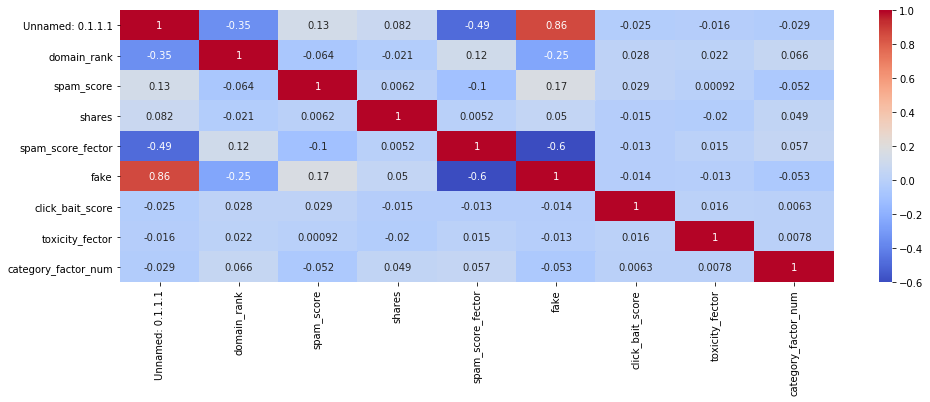

In [165]:
plt.figure(figsize = (16,5))
sns.heatmap(tc, annot=True, cmap='coolwarm')

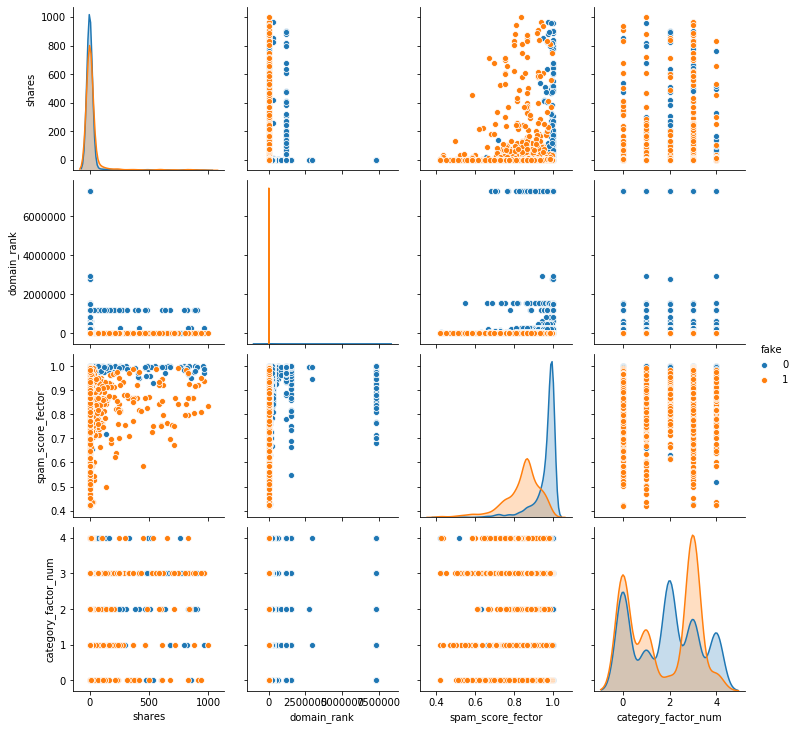

In [169]:
dk= df[[ 'shares','domain_rank','spam_score_fector','fake','category_factor_num']]
dk.head()
sns.pairplot(data=dk, hue="fake", dropna='true')

In [170]:
configure_plotly_browser_state()

## target count ##
cnt_srs = df['type'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Target distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")


In [172]:
import requests
from wordcloud import WordCloud, STOPWORDS  #install $ pip install wordcloud

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()


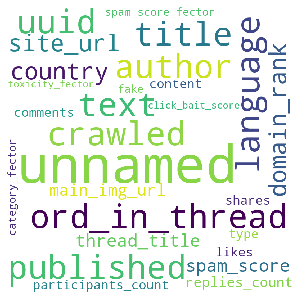

In [189]:
from wordcloud import WordCloud
df = pd.read_csv(r"E:\Downlload\MachineLearningModels-master\dataset\fake_real_dataset_test_Dheeraj.csv", encoding ="latin-1") 
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens:
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (4, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [190]:
from collections import defaultdict
df_real = df[df["type"]=='news']
df_fake = df[df["type"]!='news']

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [191]:
#MONOGRAMS
configure_plotly_browser_state()

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of real news", 
                                          "Frequent words of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

In [192]:
#BIGRAMS
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of real news", 
                                          "Frequent bigrams of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')


In [193]:
#TRIGRAMS
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')


freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of real news", 
                                          "Frequent trigrams of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')


In [194]:
df["num_words"] = df["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df["num_unique_words"] = df["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df["num_chars"] = df["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df["num_stopwords"] = df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
df["num_punctuations"] =df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
df["num_words_upper"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
df["num_words_title"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
df["mean_word_len"] = df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

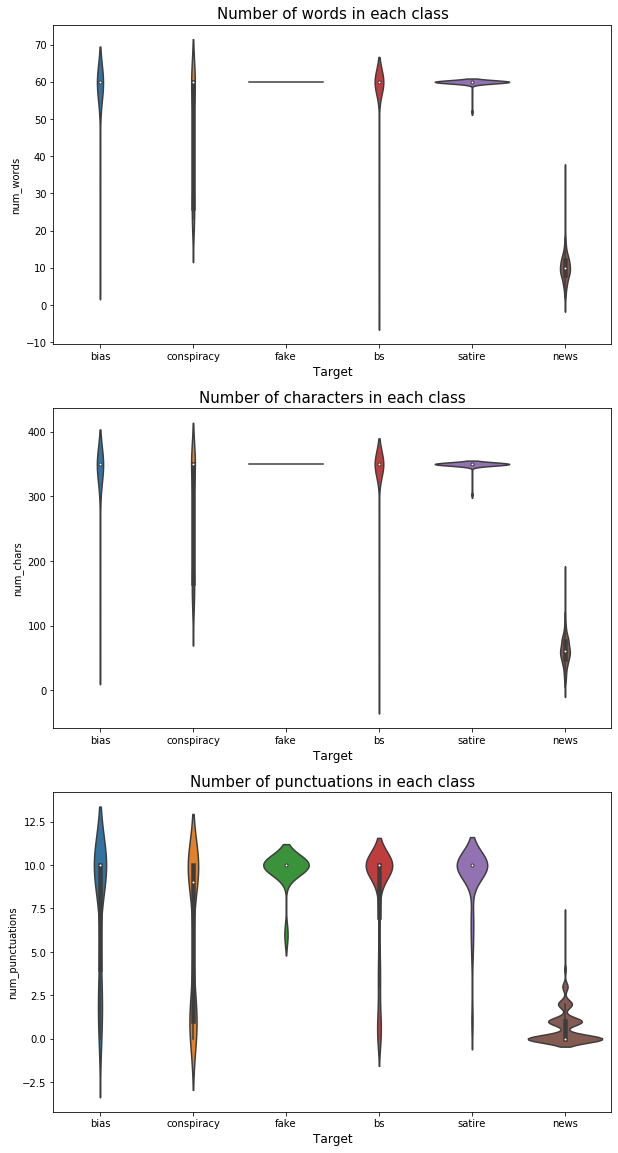

In [195]:
df['num_words'].loc[df['num_words']>60] = 60 #truncation for better visuals
df['num_punctuations'].loc[df['num_punctuations']>10] = 10 #truncation for better visuals
df['num_chars'].loc[df['num_chars']>350] = 350 #truncation for better visuals

f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.violinplot(x='type', y='num_words', data=df, ax=axes[0])
axes[0].set_xlabel('Target', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.violinplot(x='type', y='num_chars', data=df, ax=axes[1])
axes[1].set_xlabel('Target', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.violinplot(x='type', y='num_punctuations', data=df, ax=axes[2])
axes[2].set_xlabel('Target', fontsize=12)
#plt.ylabel('Number of punctuations in text', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()

In [196]:
import nltk
import re

from gensim.models import word2vec
from sklearn.manifold import TSNE

In [197]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in df["text"].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

In [198]:
corpus = build_corpus(data)        

In [199]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

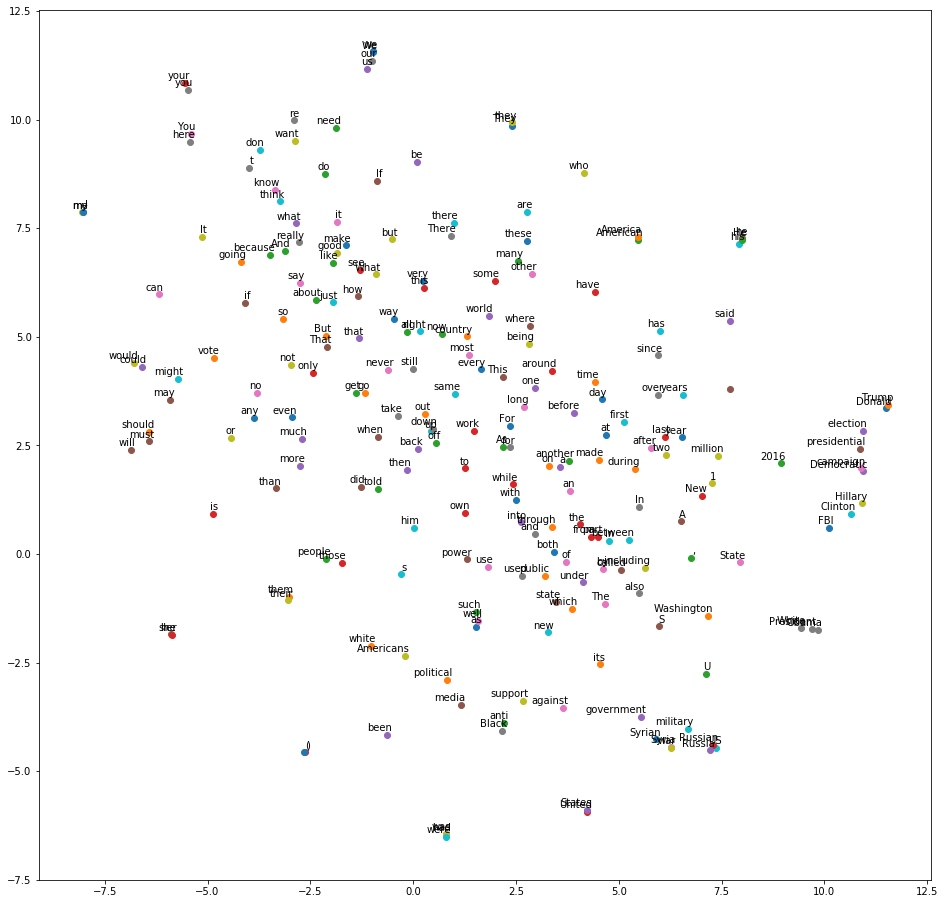

In [200]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)


In [202]:
model.most_similar('Trump')

[('Donald', 0.8706363439559937),
 ('presidential', 0.7485183477401733),
 ('election', 0.7115222215652466),
 ('campaign', 0.6382004022598267),
 ('Democratic', 0.5980129241943359),
 ('vote', 0.5262796878814697),
 ('he', 0.47468310594558716),
 ('his', 0.4726054072380066),
 ('Hillary', 0.45822569727897644),
 ('Americans', 0.45727914571762085)]

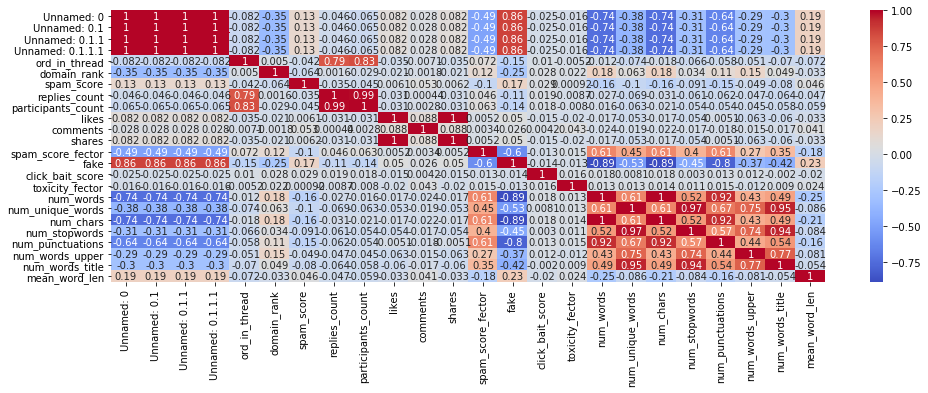

In [203]:
tc = df.corr()   #shows corelation in matrix form
plt.figure(figsize = (16,5))
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [242]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,uuid,ord_in_thread,author,published,title,text,...,click_bait_score,toxicity_fector,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
0,0,0,0,0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED They Stole Millions In Gov t...,Print They should pay all the back all the mon...,...,0.999951,0,60,80,350,42,4,1,12,4.505495
1,1,1,1,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,...,0.997981,0,60,186,350,113,10,2,67,5.047945
2,2,2,2,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING Weiner Cooperating With FBI On Hilla...,Red State Fox News Sunday reported this mo...,...,0.001113,0,60,161,350,98,10,2,31,4.694915
3,3,3,3,3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,...,0.001539,0,51,45,275,19,1,2,10,4.274510
4,4,4,4,4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,...,0.998544,0,60,223,350,132,10,9,42,5.163690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,3706,3706,3706,3706,9c4dbbf59eaf4efc4c18b4ec046fbda1ef371e8c,0,Lynh Bui,2016-11-16T21:00:00.000+02:00,How much would you pay to get a family member...,How much would you pay to get a family member...,...,0.997974,0,16,16,91,7,5,0,4,4.375000
3707,3707,3707,3707,3707,f5bb2bb212476876d80ce631885dd3319e08c562,0,sfgate.com,2016-11-30T03:57:00.000+02:00,Man pleads guilty in Clint Eastwood documentar...,Man pleads guilty in Clint Eastwood documentar...,...,0.999939,0,8,8,52,1,0,0,3,5.625000
3708,3708,3708,3708,3708,2ca49973d45886d036c6d44fd21bf649ae6629ba,0,Jonathan Garber (jgarber@businessinsider.com),2016-11-21T19:27:00.000+02:00,10 things you need to know before the opening ...,10 things you need to know before the opening ...,...,0.997737,0,10,10,50,4,0,0,0,4.100000
3709,3709,3709,3709,3709,5b74a67cb3de2d51ea495e8447ed4941c6e19443,0,Kevin Lynch,2016-11-17T19:29:00.000+02:00,9 reasons why the 49ers should bring back Kaep...,9 reasons why the 49ers should bring back Kaep...,...,0.001696,3,9,9,52,3,0,0,1,4.888889


## Model Building

In [244]:
X =df[[ 'spam_score_fector','click_bait_score','num_punctuations','num_words_upper']]
y = df['fake']

In [245]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 100)

In [246]:
Xr = df[[ 'domain_rank','num_words']]
yr = df['fake']

In [247]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=.25, random_state = 100)

In [248]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

In [249]:
from sklearn.metrics import  average_precision_score, precision_recall_curve


# Function to get Precision recall curve
def get_prec_recall (y_test,y_pred):
    average_precision = average_precision_score(y_test, y_pred)
    print('Average precision-recall score : {}'.format(average_precision))
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='cyan')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    return

## Logistic Model

In [250]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [251]:
predictions = logmodel.predict(X_test)

In [252]:
print(logmodel.coef_)

[[-6.23571302e+00 -2.89899110e-03 -6.34378514e-01 -2.73421726e-01]]


In [253]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       510
           1       0.85      0.97      0.90       418

    accuracy                           0.91       928
   macro avg       0.91      0.91      0.91       928
weighted avg       0.92      0.91      0.91       928



In [254]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logmodel, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.9108803279956679

Model Accuracy for Logistic Regression: 0.9073275862068966


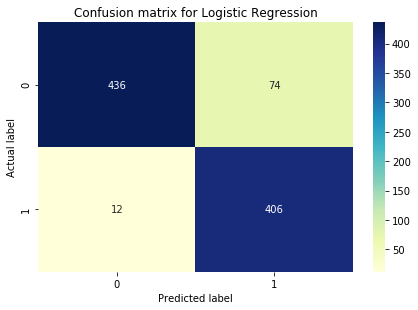

In [256]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_logreg = metrics.confusion_matrix(y_test, predictions)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Logistic Regression:",metrics.accuracy_score(y_test, predictions))

In [257]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,predictions)*100)

Accuracy :  90.73275862068965


In [258]:
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,predictions) #y_target, y_pred

0.09267241379310345

In [259]:
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,predictions) #y_target, y_pred

0.09267241379310345

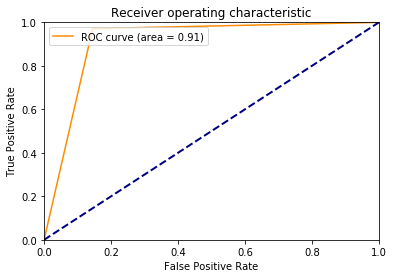

In [260]:
get_roc(y_test,predictions)

Average precision-recall score : 0.8344820711653743


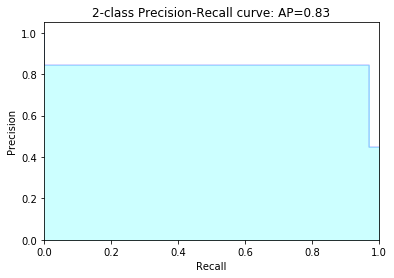

In [261]:
get_prec_recall(y_test,predictions)

In [262]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(logmodel, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(logmodel.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.909 (+/-0.077)
LogisticRegression average log_loss: 0.239 (+/-0.142)
LogisticRegression average auc: 0.955 (+/-0.044)


## Naive Bayes Model

In [263]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [266]:
y_pred = classifier.predict(X_test)

In [267]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       510
           1       0.83      0.98      0.90       418

    accuracy                           0.90       928
   macro avg       0.91      0.91      0.90       928
weighted avg       0.91      0.90      0.90       928



In [268]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.9076493643794642

Model Accuracy for Naive Bayes: 0.9019396551724138


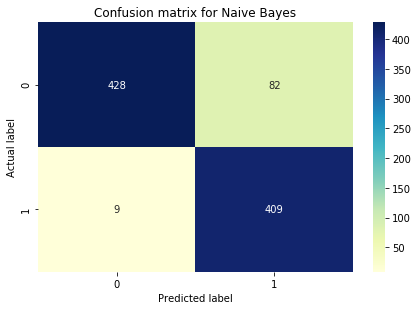

In [269]:
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_logreg = metrics.confusion_matrix(y_test, y_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

In [270]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  90.19396551724138


In [271]:
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,y_pred) #y_target, y_pred

0.0980603448275862

In [272]:
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,y_pred) #y_target, y_pred

0.0980603448275862

In [273]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

3.3869549772911083

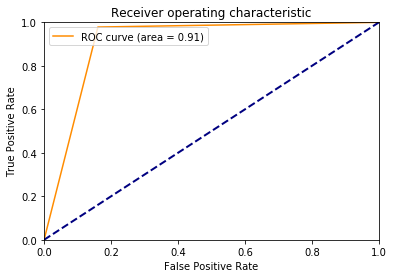

In [274]:
get_roc(y_test,y_pred)

Average precision-recall score : 0.8247568907384564


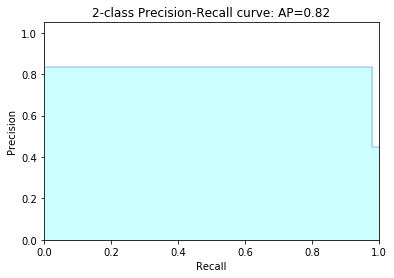

In [275]:
get_prec_recall(y_test,y_pred)

In [276]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logmodel, X = X_test, y = y_test, cv = 10)
accuracies.mean()

0.9052010285179989

In [277]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(classifier, X_train, y_train, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(classifier.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
GaussianNB average accuracy: 0.908 (+/-0.015)
GaussianNB average log_loss: 0.528 (+/-0.155)
GaussianNB average auc: 0.957 (+/-0.015)


## Desicion Tree Model

In [279]:
from sklearn.tree import DecisionTreeClassifier 
decclassifier = DecisionTreeClassifier(criterion ='entropy')
decclassifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [280]:
y_pred = decclassifier.predict(X_test)

In [281]:
decclassifier.feature_importances_

array([0.23214259, 0.11386091, 0.6042019 , 0.0497946 ])

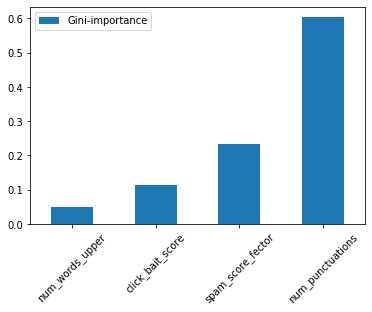

In [282]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, decclassifier.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [283]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[440,  70],
       [ 61, 357]], dtype=int64)

In [284]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       510
           1       0.84      0.85      0.84       418

    accuracy                           0.86       928
   macro avg       0.86      0.86      0.86       928
weighted avg       0.86      0.86      0.86       928



In [285]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = decclassifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8799927799695728

Model Accuracy for Decision tree: 0.8588362068965517


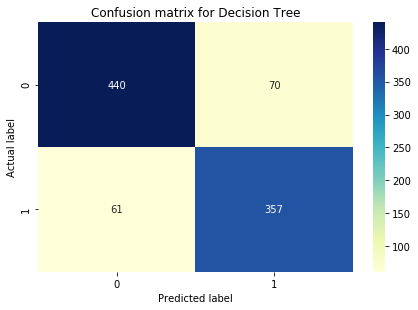

In [286]:
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_dectree = metrics.confusion_matrix(y_test, y_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dectree), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Decision tree:",metrics.accuracy_score(y_test, y_pred))

In [287]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  85.88362068965517


In [288]:
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,y_pred) #y_target, y_pred

0.1411637931034483

In [289]:
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,y_pred) #y_target, y_pred

0.1411637931034483

In [290]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

4.875684999518765

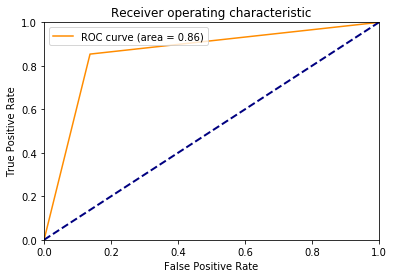

In [291]:
get_roc(y_test,y_pred)

Average precision-recall score : 0.779788763013191


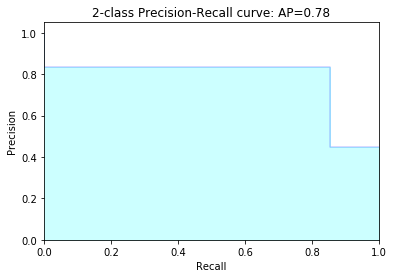

In [292]:
get_prec_recall(y_test,y_pred)

In [293]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = decclassifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8789123539877775

In [294]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(decclassifier, X_train, y_train, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(decclassifier.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
DecisionTreeClassifier average accuracy: 0.879 (+/-0.021)
DecisionTreeClassifier average log_loss: 4.098 (+/-0.691)
DecisionTreeClassifier average auc: 0.881 (+/-0.020)


## Random Forest Model

In [295]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [296]:
rfc_pred = rfc.predict(X_test)

In [297]:
rfc.feature_importances_

array([0.34800678, 0.10521469, 0.41151634, 0.13526218])

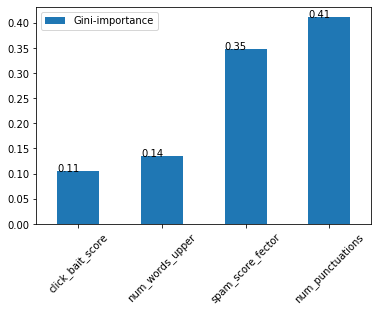

In [299]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
ax = importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=2)), (p.get_x(), p.get_height()))

In [300]:
print(confusion_matrix(y_test,rfc_pred))

[[447  63]
 [ 39 379]]


In [301]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       510
           1       0.86      0.91      0.88       418

    accuracy                           0.89       928
   macro avg       0.89      0.89      0.89       928
weighted avg       0.89      0.89      0.89       928



In [302]:
print ("Accuracy : ", metrics.accuracy_score(y_test,rfc_pred)*100 )

Accuracy :  89.00862068965517


In [303]:
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,rfc_pred) #y_target, y_pred

0.10991379310344827

In [305]:
from sklearn.metrics import log_loss
log_loss(y_test,rfc_pred)

3.7963422057316727

Model Accuracy for Decision tree: 85.88362068965517


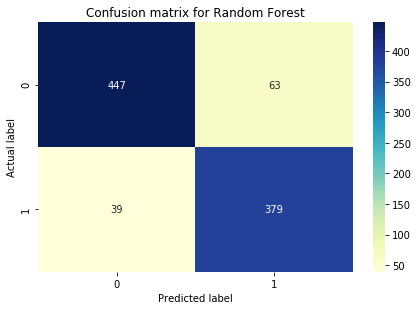

In [306]:
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_rf = metrics.confusion_matrix(y_test, rfc_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Decision tree:",metrics.accuracy_score(y_test, y_pred)  * 100)

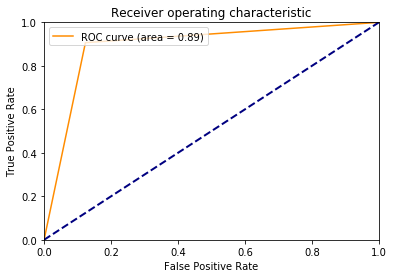

In [307]:
get_roc(y_test,rfc_pred)

Average precision-recall score : 0.8194891108944434


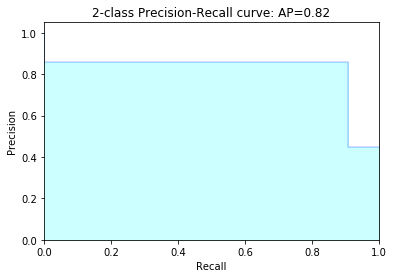

In [308]:
get_prec_recall(y_test,rfc_pred)

In [309]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.912687914184781

In [310]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(rfc, X_train, y_train, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(rfc.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
RandomForestClassifier average accuracy: 0.913 (+/-0.013)
RandomForestClassifier average log_loss: 0.275 (+/-0.095)
RandomForestClassifier average auc: 0.959 (+/-0.013)


##  SVM Model

In [311]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'rbf', random_state = 0, gamma=0.8, C=100, probability=True)
svcclassifier.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.8, kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [312]:
svc_pred = svcclassifier.predict(X_test)

In [313]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       510
           1       0.84      0.96      0.90       418

    accuracy                           0.90       928
   macro avg       0.90      0.90      0.90       928
weighted avg       0.91      0.90      0.90       928



In [314]:
print ("Accuracy : ", accuracy_score(y_test,svc_pred)*100)

Accuracy :  89.87068965517241


In [315]:
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,svc_pred) 

0.10129310344827586

In [316]:
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,svc_pred) 

0.10129310344827586

In [317]:
from sklearn.metrics import log_loss
log_loss(y_test,svc_pred)

3.4986070578891804

Model Accuracy for SVM: 89.87068965517241


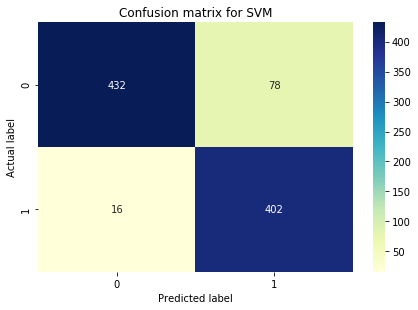

In [318]:
cm = confusion_matrix(y_test, svc_pred)
#print(cm)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for SVM:",metrics.accuracy_score(y_test, svc_pred) * 100)

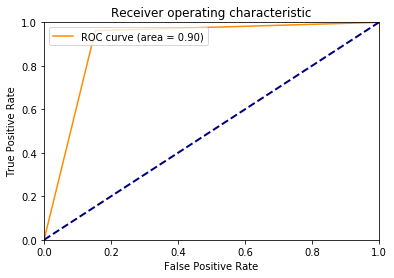

In [319]:
get_roc(y_test,svc_pred)

Average precision-recall score : 0.8226839630424023


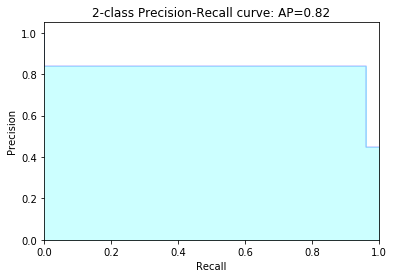

In [320]:
get_prec_recall(y_test,svc_pred)

In [321]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svcclassifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.9069247827544415

In [322]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(svcclassifier, X_train, y_train, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(svcclassifier.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
SVC average accuracy: 0.907 (+/-0.018)
SVC average log_loss: 0.295 (+/-0.068)
SVC average auc: 0.940 (+/-0.021)
